In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

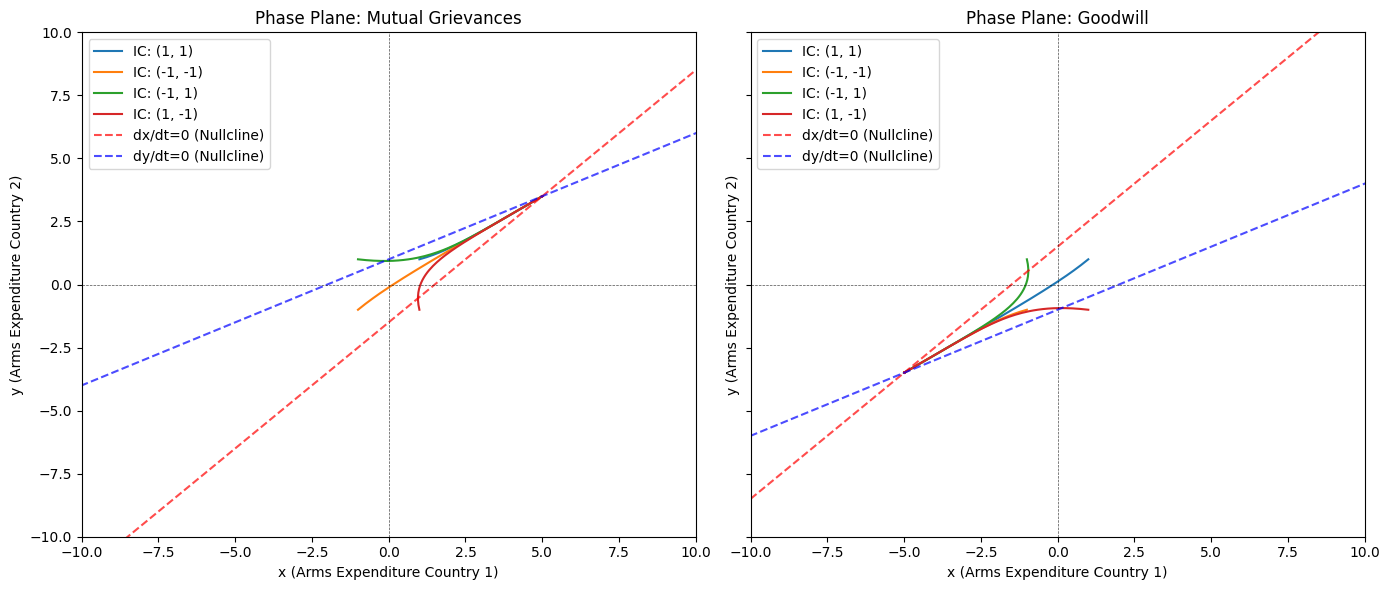

In [ ]:
def richardson_model(t, z, a, b, m, n, r, s):
    x, y = z
    dxdt = a * y - m * x + r
    dydt = b * x - n * y + s
    return [dxdt, dydt]

# parameters for mutual grievances and goodwill
parameters = {
    "mutual_grievances": {"a": 2, "b": 1, "m": 2, "n": 2, "r": 3, "s": 2},
    "goodwill": {"a": 2, "b": 1, "m": 2, "n": 2, "r": -3, "s": -2}
}

# initial conditions and time span
initial_conditions = [(1, 1), (-1, -1), (-1, 1), (1,-1)]
t_span = (0, 20)  # Time interval
t_eval = np.linspace(*t_span, 500)

# creating phase plane plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
scenarios = ["mutual_grievances", "goodwill"]

for idx, scenario in enumerate(scenarios):
    params = parameters[scenario]
    ax = axes[idx]

    # Solve the system for different initial conditions
    for x0, y0 in initial_conditions:
        sol = solve_ivp(
            richardson_model, t_span, [x0, y0], t_eval=t_eval, args=tuple(params.values())
        )
        ax.plot(sol.y[0], sol.y[1], label=f"IC: ({x0}, {y0})")

    # Plot nullclines
    x_vals = np.linspace(-10, 10, 400)
    y_nullcline = (params["m"] * x_vals - params["r"]) / params["a"]
    y_vals = np.linspace(-10, 10, 400)
    x_nullcline = (params["n"] * y_vals - params["s"]) / params["b"]
    ax.plot(x_vals, y_nullcline, 'r--', label="dx/dt=0 (Nullcline)", alpha=0.7)
    ax.plot(x_nullcline, y_vals, 'b--', label="dy/dt=0 (Nullcline)", alpha=0.7)


    ax.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7)
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_title(f"Phase Plane: {scenario.replace('_', ' ').title()}")
    ax.set_xlabel("x (Arms Expenditure Country 1)")
    ax.set_ylabel("y (Arms Expenditure Country 2)")
    ax.legend()

plt.tight_layout()
plt.show()
